# EDA on TITANIC(TRAIN) Dataser

### What is EDA?

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/content/drive/MyDrive/ColabAICW/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [10]:
patrick_data=data.loc[data.Name=='Dooley, Mr. Patrick']
patrick_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
#drop duplication
data.drop_duplicates(inplace=True)
data.shape


(891, 12)

In [16]:
#conversion of survived,pclass into categorical
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(2), float64(2), int64(3), object(5)
memory usage: 71.7+ KB


In [18]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [23]:
#replace  age(float) null values with 0
data['Age']=data['Age'].replace(np.nan,0)
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
#replace object features cabin,embarked to none
data['Cabin']=data['Cabin'].replace(np.nan,'NONE')
data['Embarked']=data['Embarked'].replace(np.nan,'NONE')
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


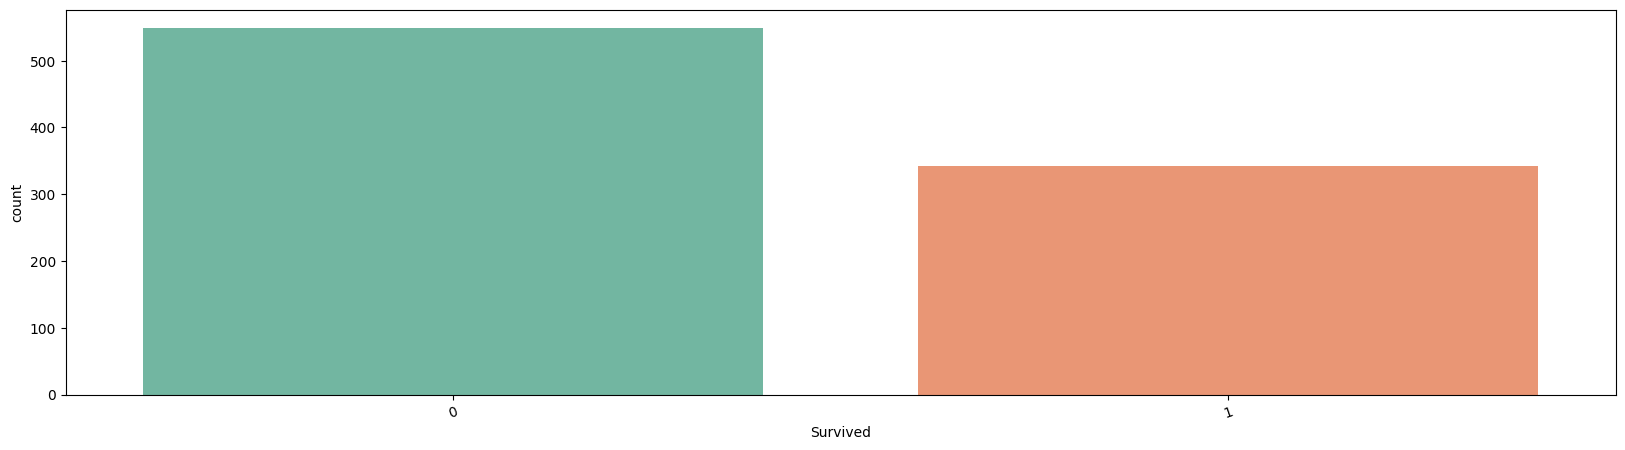

In [26]:
#Data visualization
plt.figure(figsize=(20,5))
sns.countplot(x="Survived",data=data,palette="Set2")
plt.xticks(rotation=19)
plt.show()


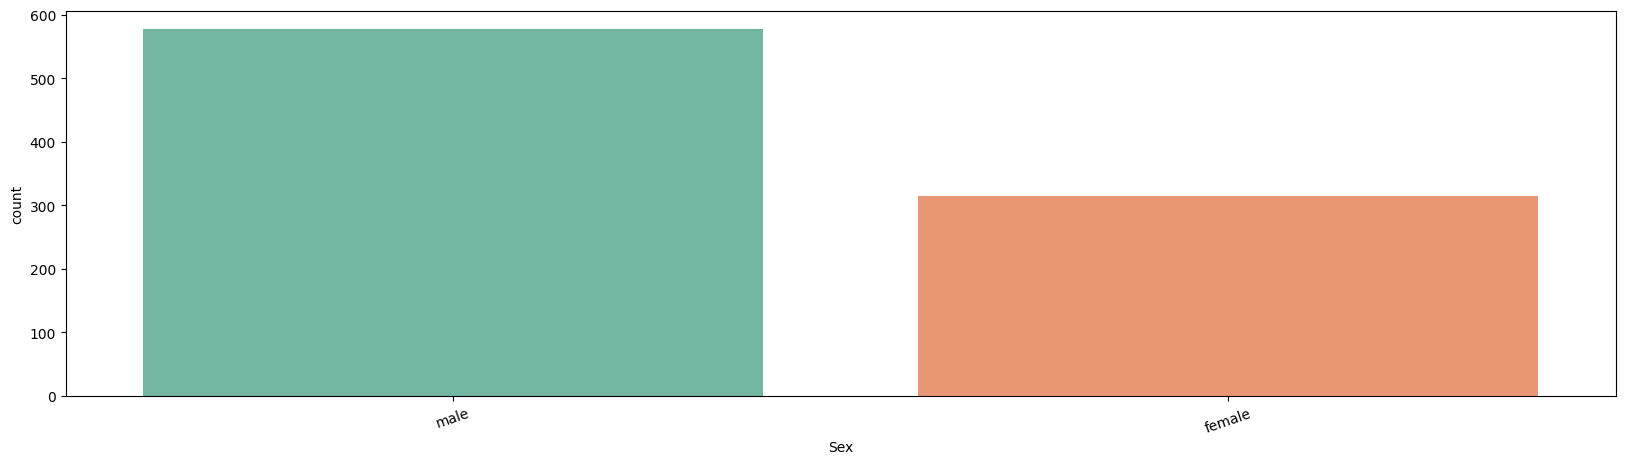

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(x="Sex",data=data,palette="Set2")
plt.xticks(rotation=19)
plt.show()

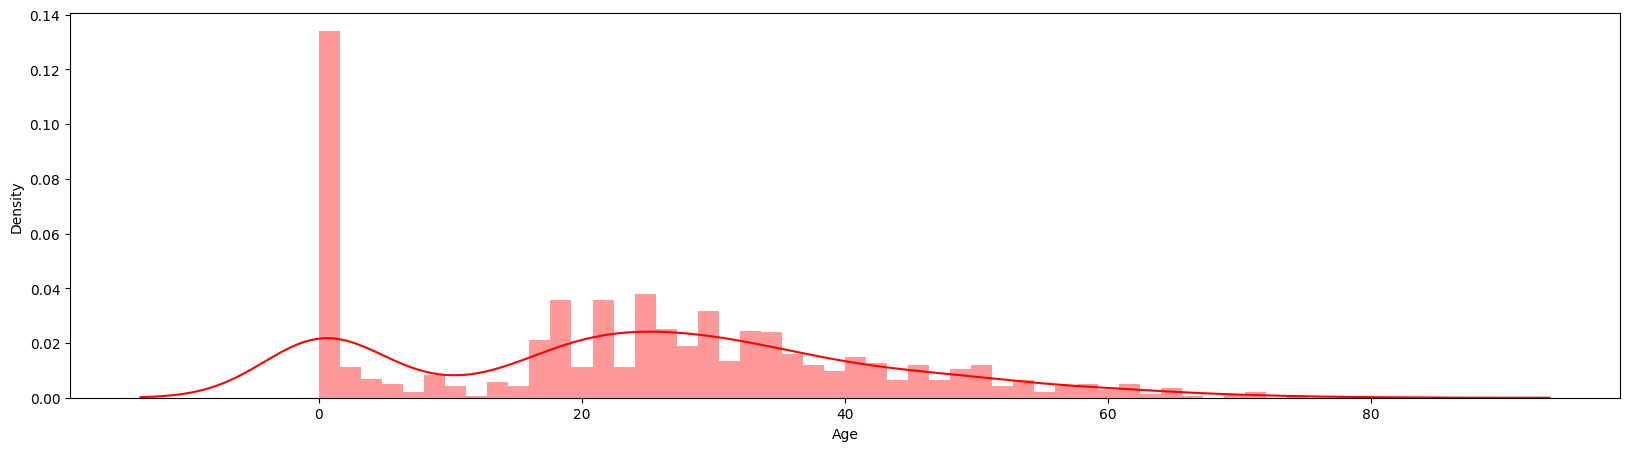

In [28]:
plt.figure(figsize=(20,5))
sns.distplot(data['Age'],color='r',bins=50)
plt.show()

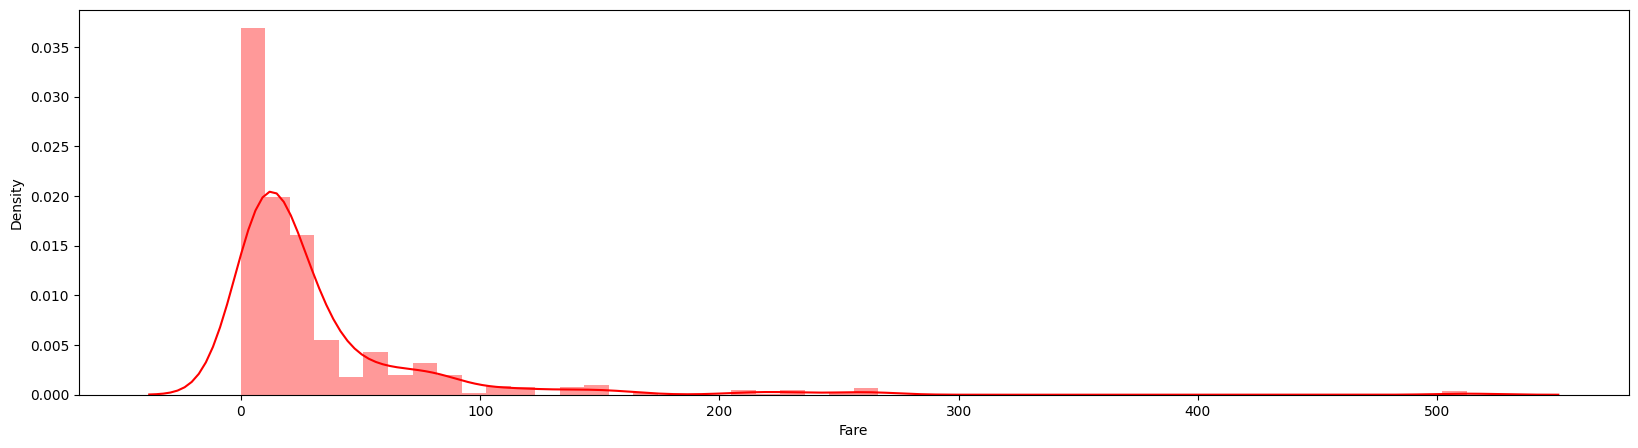

In [29]:
plt.figure(figsize=(20,5))
sns.distplot(data['Fare'],color='r',bins=50)
plt.show()

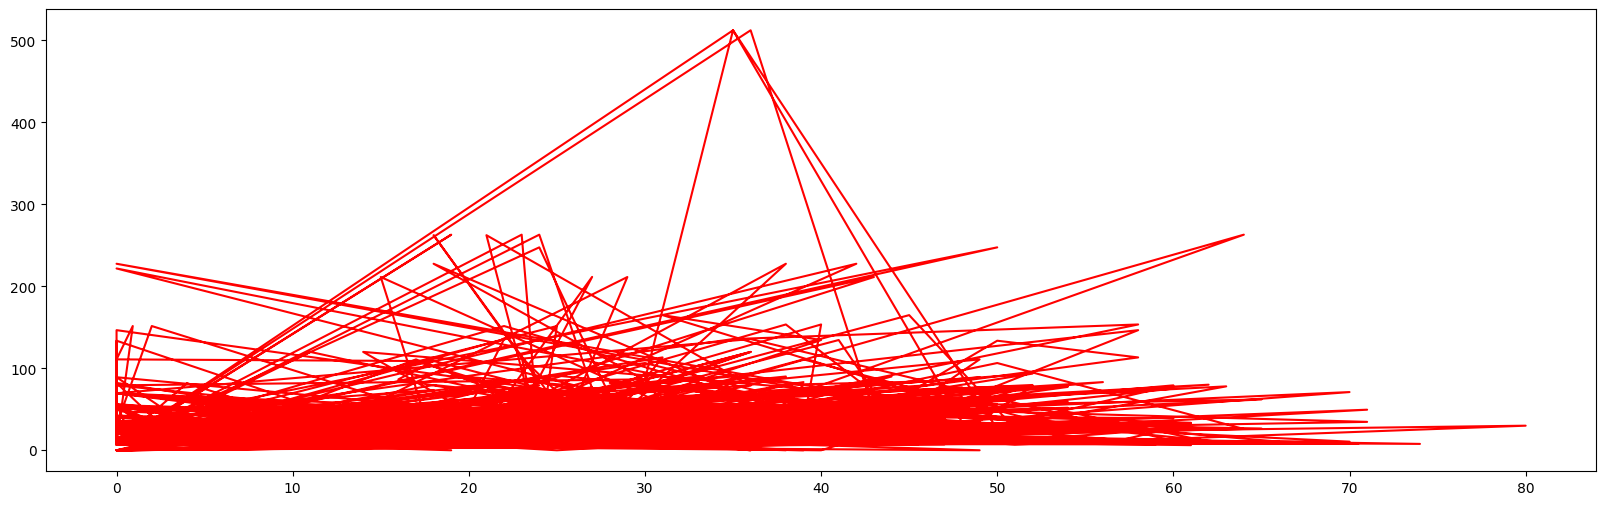

In [30]:
plt.figure(figsize=(20,6))
plt.plot(data["Age"],data["Fare"],color='r')
plt.show()

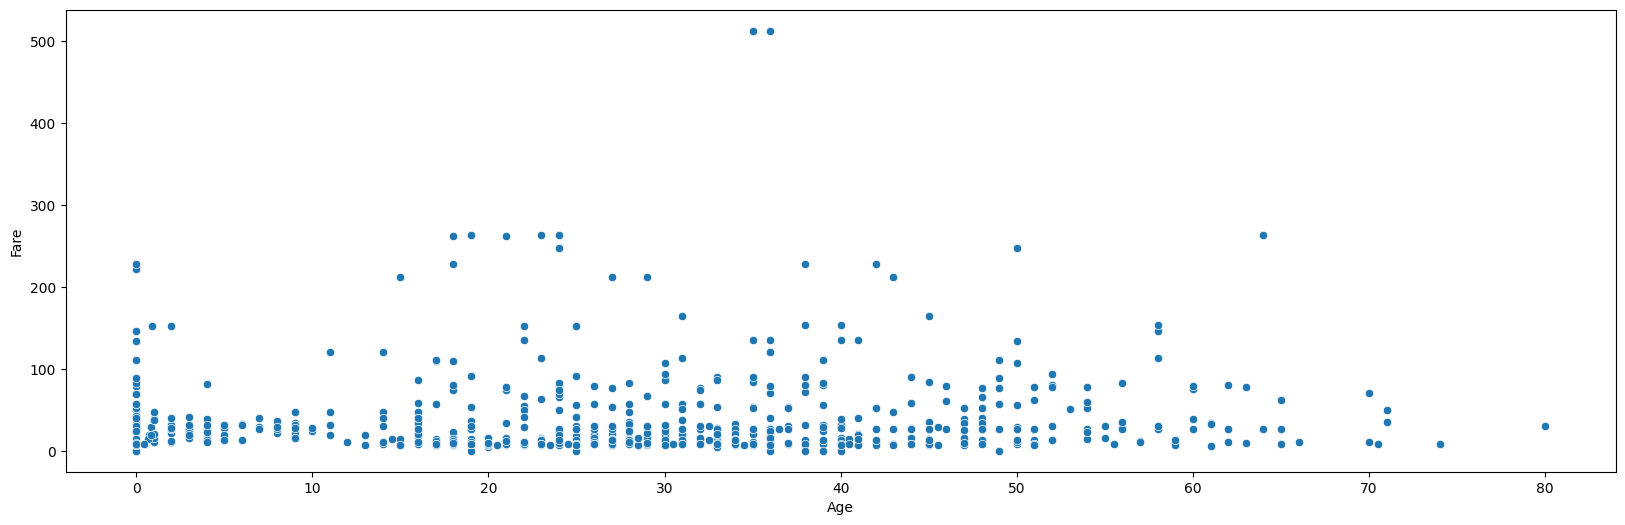

In [31]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=data.Age,y=data.Fare)
plt.show()

In [33]:
#we perform correlation only on numerical features
num_fea=['Survived','Age','Fare']
num_data=data[num_fea]
num_data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
#correlation matching
cor_mat=num_data.corr()
cor_mat

,Survived,Age,Fare
Survived,1.000000,0.010539,0.257307
Age,0.010539,1.000000,0.135516
Fare,0.257307,0.135516,1.000000


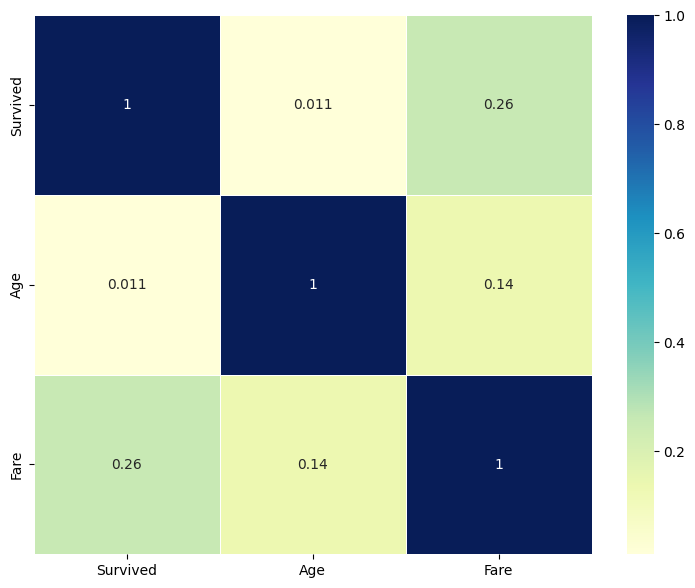

In [35]:
#we are using the heatmap for visualization of correlation
plt.figure(figsize=(9,7))
sns.heatmap(cor_mat,annot=True,cmap="YlGnBu",linewidths=.5)
plt.show()